<font color="#CA3532"><h1 align="left">**Máster en Big Data y Data Science - Fundamentos de Análisis de Datos**</h1></font>
## **PCA en Wines dataset**

#### Manuel Sánchez-Montañés

In [0]:
COLAB = True

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## **Data Load**

Now we will use clustering in a wine database. The goal is to check if the clustering discovers the different real wine types.

The database describes the parameters of different wine instances. There are 3 types of wine and 13 wine features with the levels of the most important indicators:
- Alcohol
- Malic acid
- Ash
- Ash alcalinity
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280_OD315
- Proline

Now we load this database:


In [4]:
if COLAB:
    from urllib.request import urlretrieve
    import os
    os.makedirs("datasets", exist_ok=True)
    urlretrieve("https://drive.google.com/uc?export=download&id=1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR",
                "datasets/wine_dataset.csv")

data = pd.read_csv('datasets/wine_dataset.csv', delimiter=';', header=0)

print('\033[1m' + 'Wine Database\n', '\033[0m')
print('Number of real classes (wine types): %d' % np.unique(data['Type']).shape[0])
print('Unique class labels:', np.unique(data['Type']))
print('\nFirst 5 instances:\n')
data.sample(10)

Wine Database
 
Number of real classes (wine types): 3
Unique class labels: ['A' 'B' 'C']

First 5 instances:



,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
71,B,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
80,B,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
85,B,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
14,A,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
6,A,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
152,C,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425
100,B,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
10,A,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
112,B,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
56,A,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970


## **Data Description**

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## **Data Exploration**

In [7]:
class_column = 'Type'
classes_names = data['Type'].unique()
attribute_names = list(data.columns)
attribute_names.remove(class_column)

X = data.as_matrix(columns=attribute_names)
y = data.Type

print(class_column)
print(classes_names)
print(attribute_names)

Type
['A' 'B' 'C']
['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
type(X)

numpy.ndarray

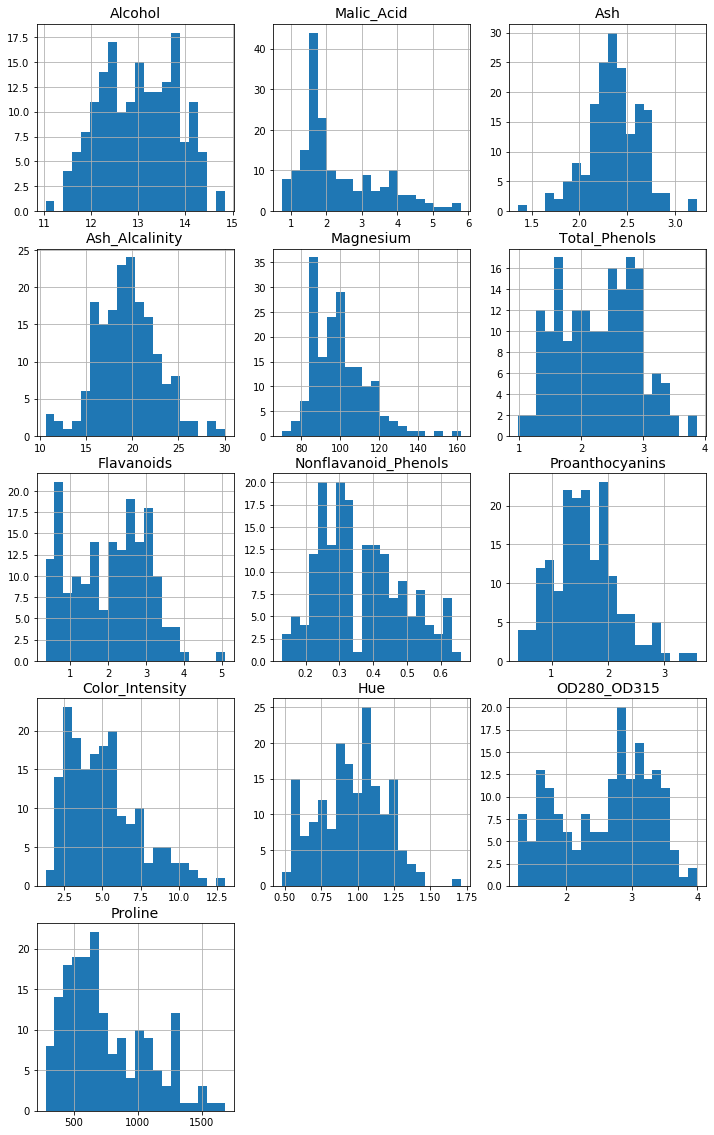

In [9]:
nrows = int(np.ceil(len(attribute_names) / 3))
plt.figure(figsize=(12,4*nrows))
for i in range(len(attribute_names)):
    name = attribute_names[i]
    plt.subplot(nrows,3,i+1)
    data[name].hist(bins=20)
    plt.title(name, fontsize=14)

In [0]:
def muestra_matriz_correlacion(X, nombres_atributos):
    plt.imshow(np.corrcoef(X, rowvar=0),
#               interpolation="nearest",
               cmap='bwr',
               vmin=-1, vmax=1,
              )
    plt.title('Matriz de correlación')
    plt.xticks(range(len(nombres_atributos)),
               nombres_atributos,fontsize=12,rotation=90)
    plt.yticks(range(len(nombres_atributos)),
               nombres_atributos,fontsize=12)
    plt.colorbar(ticks=[-1., -.5, 0., .5, 1.])

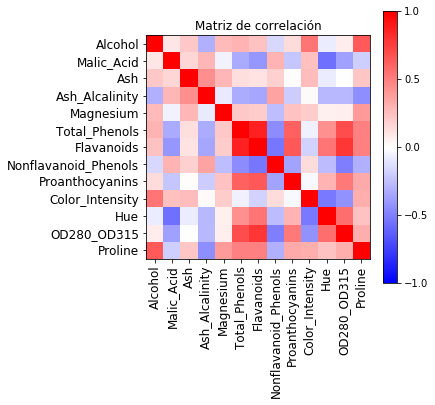

In [11]:
plt.figure(figsize=(5,5))
muestra_matriz_correlacion(X, attribute_names);

# **PCA**

After loading the database we need to do some basic preprocessing: standarization and PCA:

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#X_std = StandardScaler().fit_transform(X)
X_std = X
X_std.var(axis=0).round(3)

array([6.5500000e-01, 1.2410000e+00, 7.5000000e-02, 1.1090000e+01,
       2.0284300e+02, 3.8900000e-01, 9.9200000e-01, 1.5000000e-02,
       3.2600000e-01, 5.3440000e+00, 5.2000000e-02, 5.0100000e-01,
       9.8609601e+04])

In [31]:
pca = PCA()
X_pca = pca.fit_transform(X_std)
#pca.fit(X_std)
#X_pca = pca.transform(X_std)

print(X.shape)
print(X_std.shape)
print(X_pca.shape)

(178, 13)
(178, 13)
(178, 13)


In [32]:
2.511/(13*1.)

0.19315384615384618

In [33]:
print()
print('-- Estadísticas de los datos proyectados en las componentes principales --')
print()
#pd.DataFrame(X_pca).describe()

for i in range(X_pca.shape[1]):
    print("* Datos en componente principal", i+1, ":")
    print("  - Media    :", X_pca[:,i].mean().round(3))
    print("  - Varianza :", X_pca[:,i].var(ddof=1).round(3))
    print("  - Autovalor:", pca.explained_variance_[i].round(3))
    print("  - Varianza explicada:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()

# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
# pca = PCA(n_components=2)
# pca.fit(X_std_train)
# X_train = pca.transform(X_std_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)


-- Estadísticas de los datos proyectados en las componentes principales --

* Datos en componente principal 1 :
  - Media    : 0.0
  - Varianza : 99201.79
  - Autovalor: 99201.79
  - Varianza explicada: 99.809 %

* Datos en componente principal 2 :
  - Media    : 0.0
  - Varianza : 172.535
  - Autovalor: 172.535
  - Varianza explicada: 0.174 %

* Datos en componente principal 3 :
  - Media    : 0.0
  - Varianza : 9.438
  - Autovalor: 9.438
  - Varianza explicada: 0.009 %

* Datos en componente principal 4 :
  - Media    : -0.0
  - Varianza : 4.991
  - Autovalor: 4.991
  - Varianza explicada: 0.005 %

* Datos en componente principal 5 :
  - Media    : -0.0
  - Varianza : 1.229
  - Autovalor: 1.229
  - Varianza explicada: 0.001 %

* Datos en componente principal 6 :
  - Media    : -0.0
  - Varianza : 0.841
  - Autovalor: 0.841
  - Varianza explicada: 0.001 %

* Datos en componente principal 7 :
  - Media    : 0.0
  - Varianza : 0.279
  - Autovalor: 0.279
  - Varianza explicada: 0.0 %

*

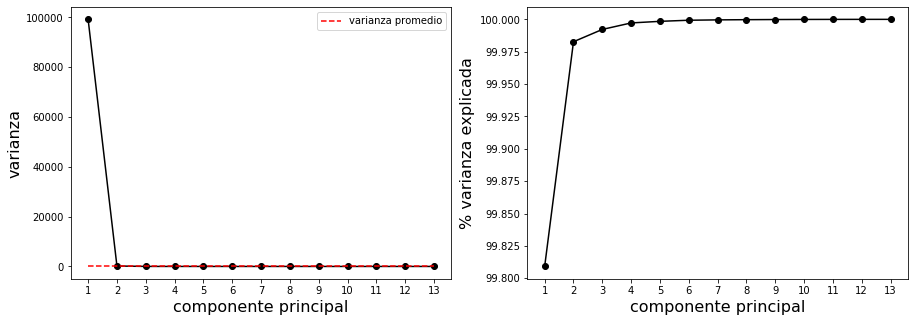

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--r', label='varianza promedio')
plt.legend()
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('varianza', fontsize=16)
plt.xticks(range(1,pca.n_components_+1))

plt.subplot(1,2,2)
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('% varianza explicada', fontsize=16)
plt.xticks(range(1,pca.n_components_+1));

In [35]:
pcs_names = ['componente principal '+str(i+1) for i in range(pca.n_components_)]
pcs_names

['componente principal 1',
 'componente principal 2',
 'componente principal 3',
 'componente principal 4',
 'componente principal 5',
 'componente principal 6',
 'componente principal 7',
 'componente principal 8',
 'componente principal 9',
 'componente principal 10',
 'componente principal 11',
 'componente principal 12',
 'componente principal 13']

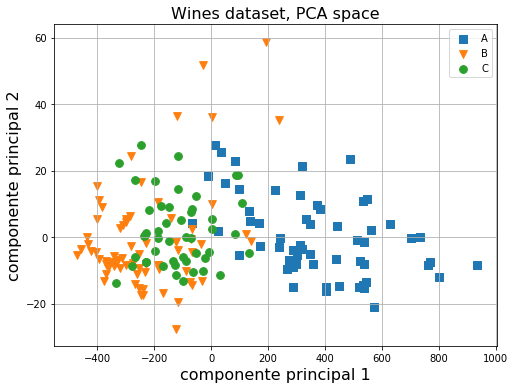

In [36]:
pc_x = 0
pc_y = 1

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for label,color,marker in zip(classes_names,colors,markers):
    inds = np.where(y == label)[0]
    plt.scatter(X_pca[inds, pc_x],
                X_pca[inds, pc_y],
                s = 60,
                c = color,
                marker = marker,
                alpha = 1.0,
                cmap='RdYlGn',
                label = label)

plt.legend(); plt.grid(); plt.tight_layout()
plt.title('Wines dataset, PCA space', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16);

In [0]:
def PCA_plot(X_std, y, attribute_names, classes_names,
             colors, markers, pca, pcs_names,
             ax, pc_x=0, pc_y=1):
    X_pca = pca.transform(X_std)
    for label,color,marker in zip(classes_names,colors,markers):
        inds = np.where(y == label)[0]
        plt.scatter(X_pca[inds, pc_x],
                    X_pca[inds, pc_y],
                    s = 60,
                    c = color,
                    marker = marker,
                    alpha = 1.0,
                    cmap='RdYlGn',
                    label = label)
    factor = 6*np.sqrt(np.max(np.cov(X_std,rowvar=False)))
    aux = np.eye(len(attribute_names))
    attributes_PCA = pca.transform(aux)
    for a,name in zip(attributes_PCA,attribute_names):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5,
                 head_length=1/4*0.1*factor*1.5, fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r')
        
    plt.legend(); plt.grid(); plt.tight_layout()
    plt.xlabel(pcs_names[pc_x], fontsize=16)
    plt.ylabel(pcs_names[pc_y], fontsize=16)

In [38]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, y, attribute_names, classes_names,
         colors, markers, pca, pcs_names, ax, pc_x=0, pc_y=1)
plt.title('Wines dataset, coordenadas PCA', fontsize=16)
plt.axis('equal');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


ValueError: ignored

<Figure size 504x504 with 1 Axes>

In [27]:
X_pca[0]

array([ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
       -0.22388013,  0.59642655,  0.06513909,  0.64144271,  1.02095585,
       -0.4515634 ,  0.54081041, -0.06623863])

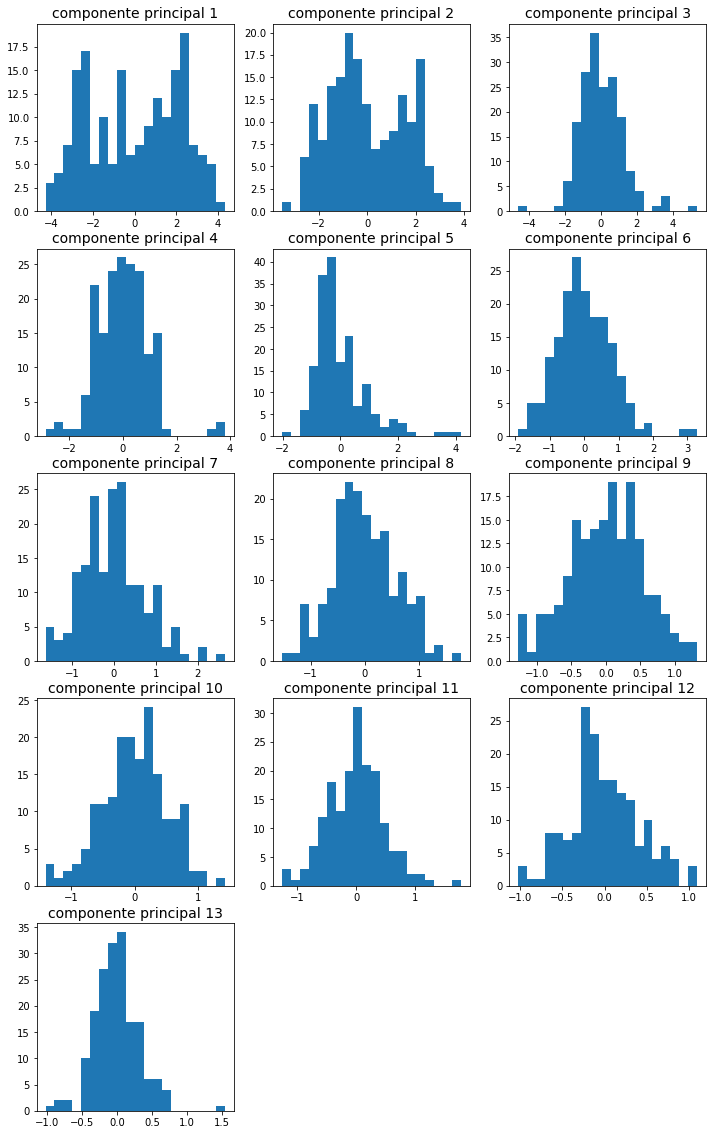

In [28]:
nrows = int(np.ceil(pca.n_components_/3))
plt.figure(figsize=(12,4*nrows))
for i in range(pca.n_components_):
    plt.subplot(nrows,3,i+1)
    plt.hist(X_pca[:,i], bins=20)
    plt.title(pcs_names[i], fontsize=14)

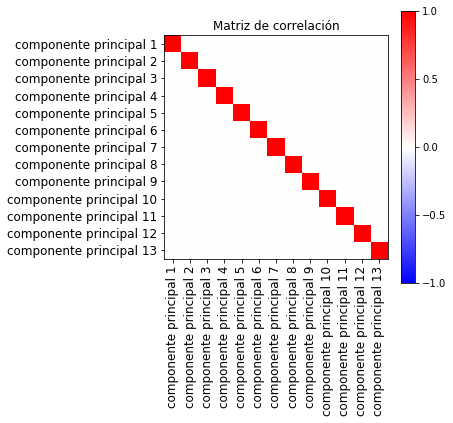

In [29]:
plt.figure(figsize=(5,5))
muestra_matriz_correlacion(X_pca, pcs_names);